# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city +"&appid=" + weather_api_key + "&units=" + units

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | alamos
Processing Record 5 of Set 1 | oodweyne
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | diboll
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | tarko-sale
Processing Record 11 of Set 1 | zhigalovo
Processing Record 12 of Set 1 | baswa
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | zhicheng
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | turabah
Processing Record 18 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 19 of Set 1 | carthage
Processing Record 20 of Set 1 | kokoda
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Se

Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | okha
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | asosa
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | la libertad
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | kralendijk
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | santa ana
Processing Record 0 of Set 5 | twon-brass
Processing Record 1 of Set 5 | leava
Processing Record 2 of Set 5 | masterton
Processing Record 3 of Set 5 | vorkuta
Processing Record 4 of Set 5 | mishawaka
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | edeia
Processing Record 7 of Set 5 | ballina
Processing Record 8 of Set 5 | taulaga
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | alice springs
Processing Record 11 of Set 5 | atafu village
Processing Record 12 of Set 5 | vizinga
Processing Record 13 of Set 5 | puerto lempira
Processing Recor

Processing Record 33 of Set 8 | maloh
Processing Record 34 of Set 8 | mount pearl
Processing Record 35 of Set 8 | xiuying
City not found. Skipping...
Processing Record 36 of Set 8 | coyuca de catalan
Processing Record 37 of Set 8 | burang
Processing Record 38 of Set 8 | omagh
Processing Record 39 of Set 8 | rengasdengklok
Processing Record 40 of Set 8 | villa de soto
Processing Record 41 of Set 8 | kingscliff
Processing Record 42 of Set 8 | kapuskasing
Processing Record 43 of Set 8 | truth or consequences
Processing Record 44 of Set 8 | beoumi
Processing Record 45 of Set 8 | toga village
City not found. Skipping...
Processing Record 46 of Set 8 | tayoltita
Processing Record 47 of Set 8 | punta arenas
Processing Record 48 of Set 8 | novyy urengoy
Processing Record 49 of Set 8 | haeju
Processing Record 0 of Set 9 | peniche
Processing Record 1 of Set 9 | prince george
Processing Record 2 of Set 9 | quang ngai
Processing Record 3 of Set 9 | tanout
Processing Record 4 of Set 9 | copala
Proc

Processing Record 23 of Set 12 | san jose village
City not found. Skipping...
Processing Record 24 of Set 12 | gulf shores
Processing Record 25 of Set 12 | ivins
Processing Record 26 of Set 12 | kingaroy
Processing Record 27 of Set 12 | usogorsk
Processing Record 28 of Set 12 | egilsstadir
Processing Record 29 of Set 12 | antsohihy
Processing Record 30 of Set 12 | mil'kovo
Processing Record 31 of Set 12 | pavlodar
Processing Record 32 of Set 12 | salym
Processing Record 33 of Set 12 | zhelezinka
Processing Record 34 of Set 12 | mpika
Processing Record 35 of Set 12 | mahibadhoo
Processing Record 36 of Set 12 | aswan
Processing Record 37 of Set 12 | juan griego
Processing Record 38 of Set 12 | tondano
Processing Record 39 of Set 12 | eagle point
Processing Record 40 of Set 12 | yazman
Processing Record 41 of Set 12 | black river
Processing Record 42 of Set 12 | fisterra
Processing Record 43 of Set 12 | kidal
Processing Record 44 of Set 12 | zelino
Processing Record 45 of Set 12 | kolonia

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,25.96,80,40,2.57,US,1686597659
1,isafjordur,66.0755,-23.1240,12.02,54,20,7.20,IS,1686597659
2,grytviken,-54.2811,-36.5092,-3.30,91,28,4.39,GS,1686597194
3,alamos,27.0167,-108.9333,36.18,14,100,3.06,MX,1686597660
4,oodweyne,9.4092,45.0640,26.13,54,100,6.58,SO,1686597660


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,25.96,80,40,2.57,US,1686597659
1,isafjordur,66.0755,-23.1240,12.02,54,20,7.20,IS,1686597659
2,grytviken,-54.2811,-36.5092,-3.30,91,28,4.39,GS,1686597194
3,alamos,27.0167,-108.9333,36.18,14,100,3.06,MX,1686597660
4,oodweyne,9.4092,45.0640,26.13,54,100,6.58,SO,1686597660


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

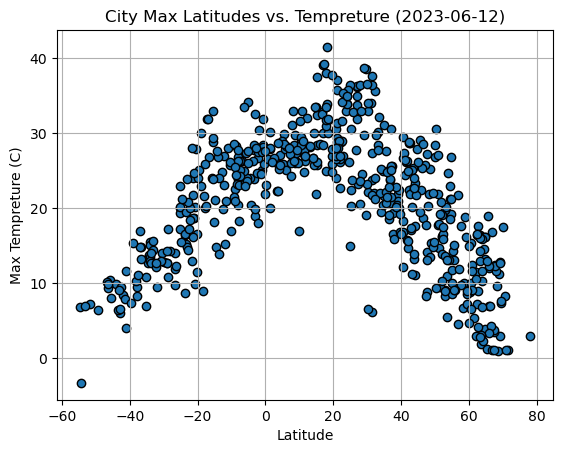

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           linestyle = "-",
           edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (C)")
plt.title("City Max Latitudes vs. Tempreture (2023-06-12)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1_City Max Latitudes vs. Tempreture.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

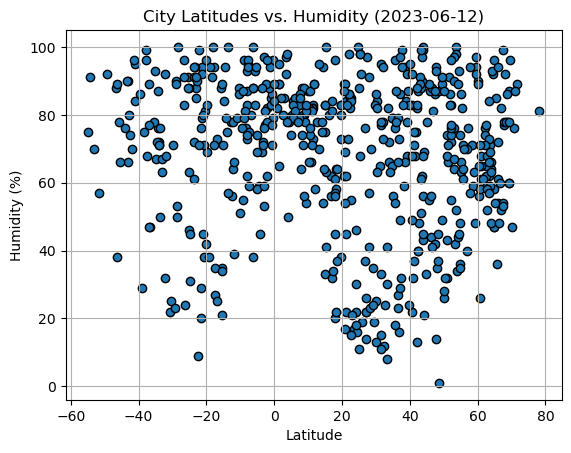

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           linestyle = "-",
           edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitudes vs. Humidity (2023-06-12)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2_City Latitudes vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

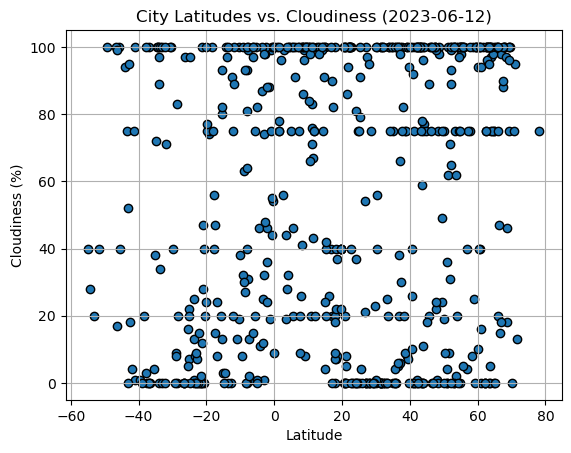

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           linestyle = "-",
           edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitudes vs. Cloudiness (2023-06-12)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3_City Latitudes vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

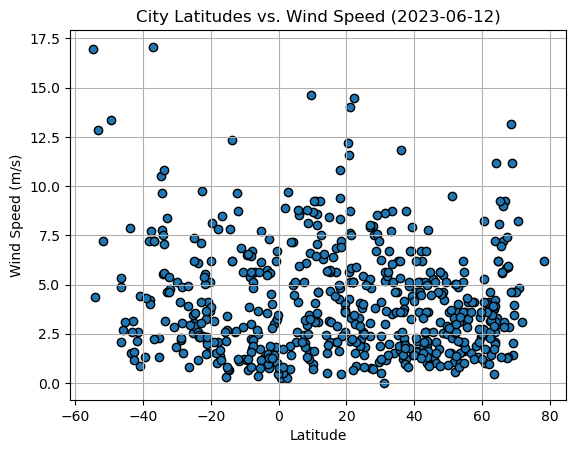

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           linestyle = "-",
           edgecolor = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitudes vs. Wind Speed (2023-06-12)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4_City Latitudes vs. Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def liner_aggression(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue}")
    print(line_eq)
    plt.show()
          

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,25.96,80,40,2.57,US,1686597659
1,isafjordur,66.0755,-23.1240,12.02,54,20,7.20,IS,1686597659
3,alamos,27.0167,-108.9333,36.18,14,100,3.06,MX,1686597660
4,oodweyne,9.4092,45.0640,26.13,54,100,6.58,SO,1686597660
6,diboll,31.1871,-94.7810,34.01,65,0,0.00,US,1686597660


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-3.30,91,28,4.39,GS,1686597194
5,adamstown,-25.0660,-130.1015,19.98,63,22,3.05,PN,1686597195
7,dunedin,-45.8742,170.5036,10.45,78,100,2.68,NZ,1686597660
8,uturoa,-16.7333,-151.4333,26.90,73,8,8.48,PF,1686597661
12,port-aux-francais,-49.3500,70.2167,6.45,92,100,13.36,TF,1686597662


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7586710386704001
y = -0.35x + 34.6


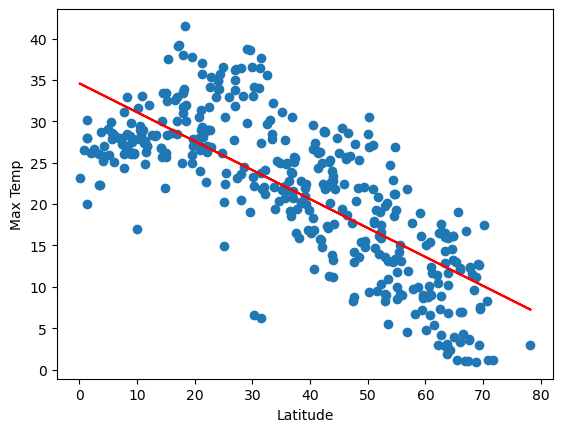

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

liner_aggression(x_values, y_values)

The r-value is: 0.8332890500004042
y = 0.44x + 28.27


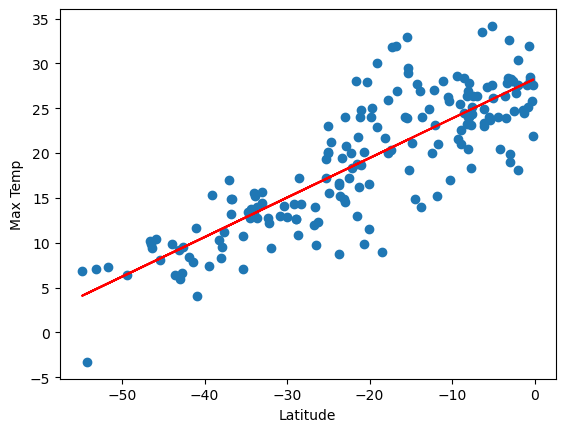

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

liner_aggression(x_values, y_values)

**Discussion about the linear relationship:** 
The graph displays a negative correlation in the Northen hemisphere, the further to the equator the tempreture decreases, which means the tempreture drops as the latitude gets higher.

The graph displays a positive correlation in the Northen hemisphere, the closer to the equator the tempreture increases, which means the tempreture rise as the latitude gets higher.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04885336697732116
y = -0.06x + 68.73


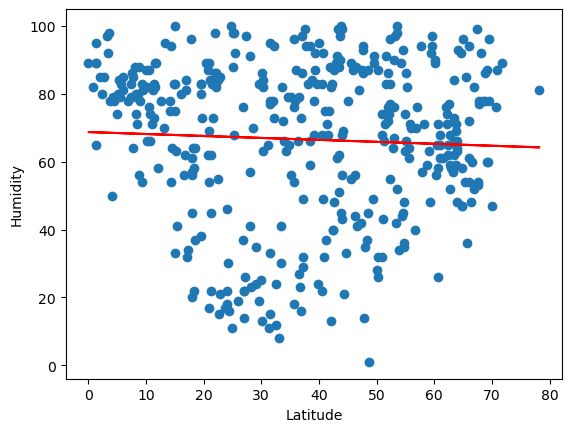

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

liner_aggression(x_values, y_values)

The r-value is: 0.07086038542771433
y = 0.1x + 75.0


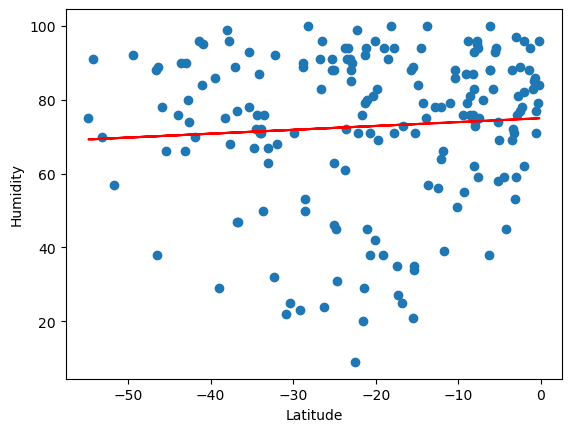

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

liner_aggression(x_values, y_values)

**Discussion about the linear relationship:**

Both graphs for Northern and Southern hemisphere did not display a significat correlation between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0301935930339606
y = 0.06x + 56.52


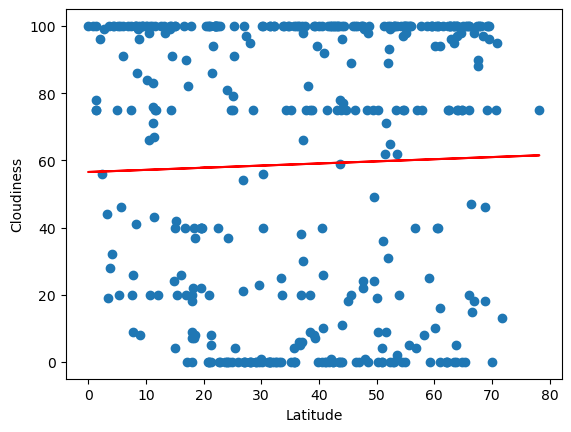

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

liner_aggression(x_values, y_values)

The r-value is: 0.08934468008084695
y = 0.25x + 50.98


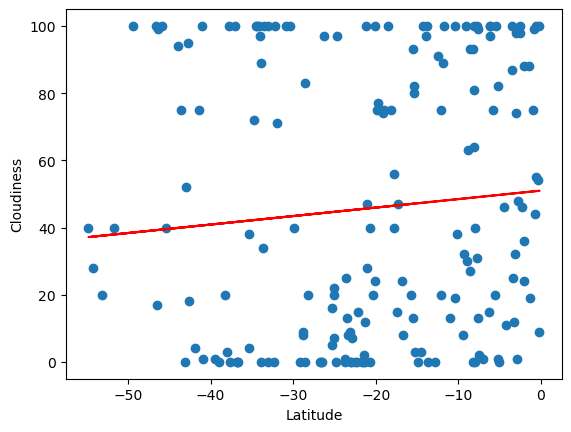

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

liner_aggression(x_values, y_values)

**Discussion about the linear relationship:** 

Both graphs for Northern and Southern hemisphere did not display a significat correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09841207141101128
y = -0.01x + 4.55


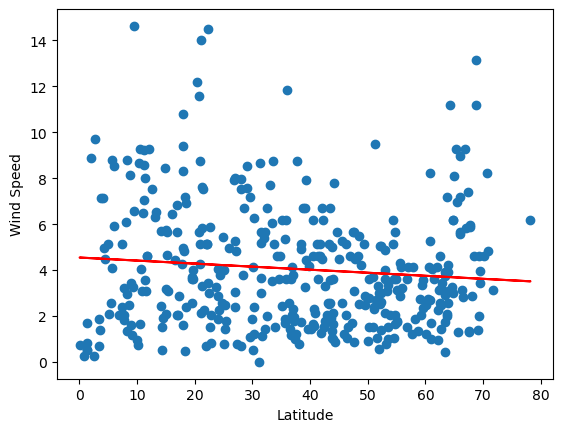

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

liner_aggression(x_values, y_values)

The r-value is: -0.29202243516174176
y = -0.06x + 2.81


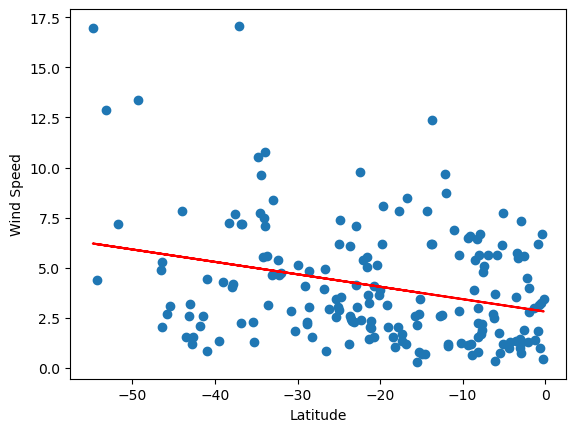

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

liner_aggression(x_values, y_values)

**Discussion about the linear relationship:** 

Both graphs for Northern and Southern hemisphere did not display a significat correlation between latitude and wind speed.